In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [29]:
train = pd.read_csv("label811_49_train.csv")
val = pd.read_csv("label811_49_val.csv")
test = pd.read_csv("label811_49_test.csv")
combined = pd.concat([train, val, test])

In [30]:
combined.head()

,tissue,label,chr,pos,ref,alt
0,0,0,chr11,315745,G,T
1,0,0,chr17,45997247,A,G
2,0,0,chr3,18351200,A,C
3,0,0,chr21,44335477,C,T
4,0,0,chr5,200753,G,A


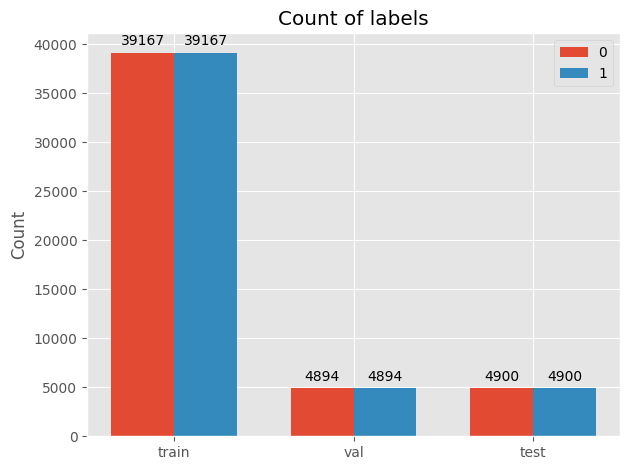

In [31]:
labels = ["train", "val", "test"]
zeros = [train.label.value_counts()[0], val.label.value_counts()[0], test.label.value_counts()[0]]
ones = [train.label.value_counts()[1], val.label.value_counts()[1], test.label.value_counts()[1]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, zeros, width, label='0')
rects2 = ax.bar(x + width / 2, ones, width, label='1')

ax.set_ylabel('Count')
ax.set_title('Count of labels')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

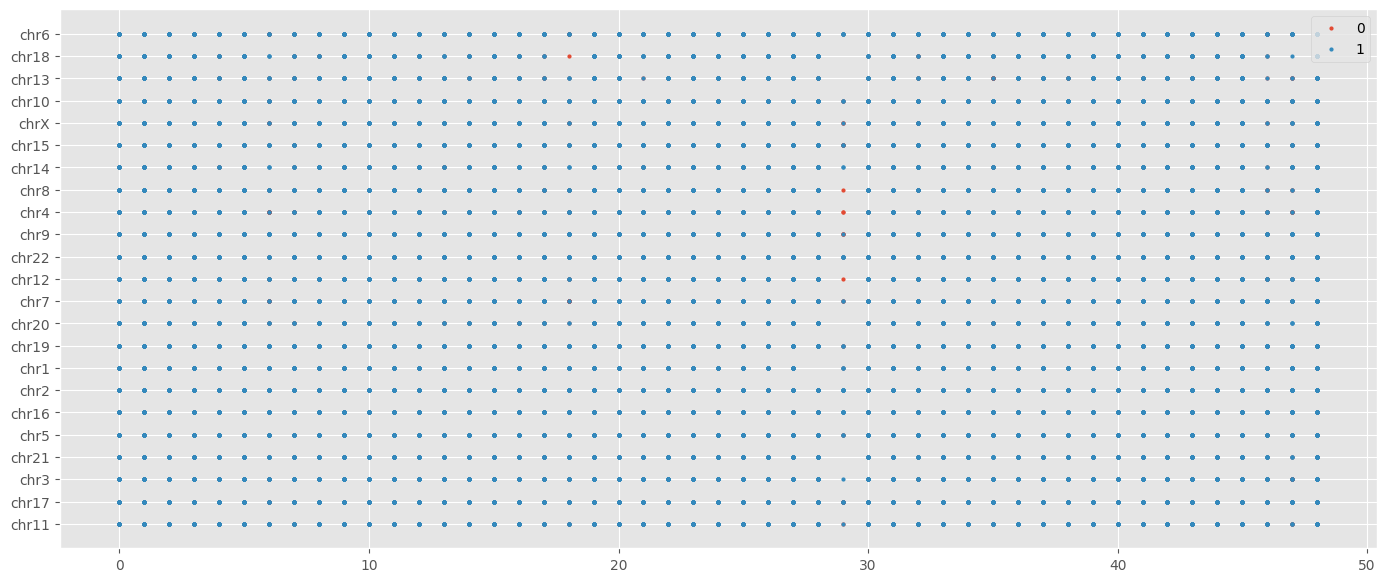

In [33]:
groups = combined.reset_index().groupby('label')

fig, axs = plt.subplots(figsize=(17, 7))
for name, group in groups:
    plt.plot(group.tissue, group.chr, marker='o', linestyle='', markersize=2, label=name)

plt.legend()